<a href="https://colab.research.google.com/github/Skurmes/Data-Science-Project/blob/Testing/EthereumTest_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [40]:
#Loading the data

from google.colab import files
upload = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [41]:
#Storing the data into Dataframes
df_ETH = pd.read_csv('ETH-USD (1).csv')
df_DOGE = pd.read_csv('DOGE-USD.csv')
df_BTC = pd.read_csv('BTC-USD.csv')

In [5]:
crypto = 'ETH'
currency = 'USD'

start = dt.datetime(2020,5,29)
end = dt.datetime.now()

data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

In [6]:
data.index = pd.to_datetime(data.index)

In [7]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-28,224.216873,218.238052,219.925049,220.675125,1.226582e+10,220.675125
2020-05-29,243.943146,218.744461,220.717209,242.345596,1.502740e+10,242.345596
2020-05-30,244.045258,230.052826,242.351379,230.975708,1.223490e+10,230.975708
2020-05-31,248.236282,230.488052,230.860260,246.991760,1.395173e+10,246.991760
2020-06-01,252.222000,233.225296,246.828186,237.219055,1.378211e+10,237.219055
...,...,...,...,...,...,...
2021-06-24,2017.759521,1794.400391,1989.215820,1813.217285,2.277433e+10,1813.217285
2021-06-25,1850.179810,1719.559448,1810.884277,1829.239258,2.063754e+10,1829.239258
2021-06-26,1979.958130,1811.245850,1830.996948,1978.894653,1.988547e+10,1978.894653


In [29]:
#Statistical labeling Ethereum
df_ETH.describe()

,Open,High,Low,Close,Adj Close,Volume
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,1204.019287,1256.404665,1144.204369,1208.678389,1208.678389,2.367018e+10
std,970.136810,1019.286400,910.345591,969.682697,969.682697,1.419217e+10
min,222.914490,228.598282,219.472672,222.959793,222.959793,5.109033e+09
25%,386.373398,395.907883,374.979446,386.528228,386.528228,1.242225e+10
50%,638.315186,662.699097,628.334961,642.868958,642.868958,2.024132e+10
75%,1851.146485,1933.616760,1791.458191,1861.306579,1861.306579,3.193287e+10
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10


In [32]:
#Statistical labeling DOGE
df_DOGE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,0.083927,0.092667,0.075237,0.084410,0.084410,3.012473e+09
std,0.147021,0.163813,0.129815,0.147267,0.147267,7.195805e+09
min,0.002307,0.002327,0.002277,0.002309,0.002309,2.275453e+07
25%,0.002960,0.003091,0.002890,0.002989,0.002989,6.602140e+07
50%,0.004508,0.004703,0.004278,0.004548,0.004548,1.755203e+08
75%,0.058790,0.062258,0.056453,0.058994,0.058994,2.468435e+09
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [42]:
#Statistical labeling BitCoin
df_BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,29645.615331,30566.603855,28605.376103,29713.272792,29713.272792,4.494340e+10
std,17948.303476,18519.871336,17223.446524,17917.718365,17917.718365,2.676900e+10
min,9072.849609,9162.183594,8977.015625,9073.942383,9073.942383,1.225260e+10
25%,11662.973144,11797.744629,11428.699707,11678.279785,11678.279785,2.583935e+10
50%,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,4.085632e+10
75%,46593.199219,48417.126953,45141.027344,46620.646485,46620.646485,5.844105e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [9]:
pred_days = 30 # no. of days you're considering for the prediction

In [10]:
x_train, y_train = [], []

for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
12/12 [==============================] - 5s 42ms/step - loss: 0.0408
Epoch 2/30
12/12 [==============================] - 1s 43ms/step - loss: 0.0117
Epoch 3/30
12/12 [==============================] - 1s 44ms/step - loss: 0.0081
Epoch 4/30
12/12 [==============================] - 1s 44ms/step - loss: 0.0073
Epoch 5/30
12/12 [==============================] - 1s 42ms/step - loss: 0.0078
Epoch 6/30
12/12 [==============================] - 1s 43ms/step - loss: 0.0063
Epoch 7/30
12/12 [==============================] - 0s 41ms/step - loss: 0.0059
Epoch 8/30
12/12 [==============================] - 1s 43ms/step - loss: 0.0065
Epoch 9/30
12/12 [==============================] - 1s 44ms/step - loss: 0.0056
Epoch 10/30
12/12 [==============================] - 1s 42ms/step - loss: 0.0051
Epoch 11/30
12/12 [==============================] - 1s 42ms/step - loss: 0.0057
Epoch 12/30
12/12 [==============================] - 1s 42ms/step - loss: 0.0047
Epoch 13/30
12/12 [==================

In [43]:
test_start = dt.datetime(2021,6,29)
test_end = dt.datetime.now()

ETH_data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

In [44]:
ETH_data.index = pd.to_datetime(ETH_data.index)

In [45]:
ETH_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-28,224.216873,218.238052,219.925049,220.675125,1.226582e+10,220.675125
2020-05-29,243.943146,218.744461,220.717209,242.345596,1.502740e+10,242.345596
2020-05-30,244.045258,230.052826,242.351379,230.975708,1.223490e+10,230.975708
2020-05-31,248.236282,230.488052,230.860260,246.991760,1.395173e+10,246.991760
2020-06-01,252.222000,233.225296,246.828186,237.219055,1.378211e+10,237.219055
...,...,...,...,...,...,...
2021-06-24,2017.759521,1794.400391,1989.215820,1813.217285,2.277433e+10,1813.217285
2021-06-25,1850.179810,1719.559448,1810.884277,1829.239258,2.063754e+10,1829.239258
2021-06-26,1979.958130,1811.245850,1830.996948,1978.894653,1.988547e+10,1978.894653


In [46]:
actual_prices = ETH_data['Close']

In [47]:
actual_prices = np.array(actual_prices)
actual_prices

array([ 220.67512512,  242.34559631,  230.97570801,  246.99176025,
        237.21905518,  244.17932129,  244.4263916 ,  241.22198486,
        241.93132019,  245.16725159,  246.30990601,  244.91145325,
        247.44494629,  231.70266724,  237.49320984,  238.90884399,
        234.11470032,  229.9289093 ,  234.41616821,  233.02827454,
        232.10116577,  227.13829041,  229.27426147,  228.98982239,
        242.53318787,  244.14215088,  235.77246094,  232.94448853,
        229.66804504,  222.95979309,  225.34716797,  228.19487   ,
        226.31500244,  231.11341858,  229.39219666,  225.3870697 ,
        229.07411194,  227.66459656,  241.51022339,  239.07553101,
        246.67001343,  243.01596069,  240.98498535,  239.45817566,
        242.13169861,  239.60458374,  240.21148682,  238.42352295,
        233.6408844 ,  232.77308655,  235.48381042,  238.48751831,
        236.15316772,  245.01672363,  262.19064331,  274.6890564 ,
        279.21542358,  304.0567627 ,  309.64361572,  321.51409

In [48]:
total_dataset = pd.concat((data['Close'], ETH_data['Close']), axis=0)

In [49]:
total_dataset.index = pd.to_datetime(total_dataset.index)

In [50]:
model_inputs = total_dataset[len(total_dataset)-len(ETH_data)-pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [51]:
x_test = []

for x in range(pred_days, len(model_inputs)):
  x_test.append(model_inputs[x-pred_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [52]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

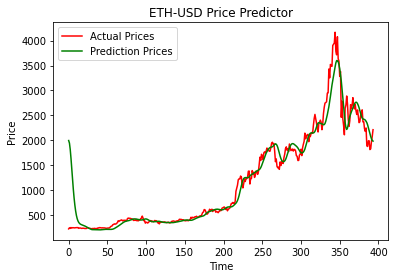

In [53]:
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.title(f"{crypto}-{currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()